In [1]:
import keras
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
input_shape = (28,28,1) #data setteki resim boyutu 28x28 ve siyah beyaz

In [3]:
def pltData(history,metric):
    
    #görselleştirme fonksiyonu
    
    train_metrics = history.history[metric]
    validation_metrics = history.history["val_"+metric]
    
    epochs = range(1, len(train_metrics)+1)
    
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, validation_metrics)
    
    plt.title("Training&Validation"+metric)
    
    plt.xlabel("Epochs")
    plt.ylabel("metric")
    plt.legend(["train_"+metric,"val_"+metric])
    
    plt.show()

In [4]:
def plotLR(history):
    
    # learning_rate görselleştirme fonksiyonu
    
    learning_rate = history.history["lr"]
    
    epochs = range(1, len(learning_rate)+1)
    
    plt.plot(epochs, learning_rate)
    
    plt.title("learning rate")
    
    plt.xlabel("Epochs")
    plt.ylabel("learning rate")
    
    plt.show()

In [5]:
#mnist datasetini çağırdık
from keras.datasets import mnist

(train_images,train_labels)=mnist.load_data()[0]

(test_images,test_labels)=mnist.load_data()[1]

print("Shape of Train Images:",train_images.shape)

print("Shape of Test Images:",test_images.shape)

Shape of Train Images: (60000, 28, 28)
Shape of Test Images: (10000, 28, 28)


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D

def mnist_model(input_shape):
    model = Sequential([
                        Conv2D(28,kernel_size=(3,3),input_shape=input_shape),
                        MaxPooling2D(pool_size=(2,2)),
                        Flatten(),
                        Dense(128,activation="relu"),
                        Dropout(0.2),
                        Dense(10,activation="softmax")
                        ])
    model.compile(
                  optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"]
                  )
    return model

In [7]:
model = mnist_model(input_shape)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 128)               605824    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

EarlyStopping aslında modelin gelişimini kontrol eden gelişmediği anda işlemleri kesen bir kütüphane

In [8]:
from keras.callbacks import EarlyStopping 

early_stopping = EarlyStopping()
history_early_stopping = model.fit(
                                    x = train_images,
                                    y = train_labels,
                                    epochs = 50,
                                    validation_split = 0.20,
                                    batch_size = 64,
                                    verbose = 2,
                                    callbacks = [early_stopping]
                                    )

Epoch 1/50
750/750 - 10s - loss: 1.1575 - accuracy: 0.8178 - val_loss: 0.2934 - val_accuracy: 0.9302 - 10s/epoch - 14ms/step
Epoch 2/50


KeyboardInterrupt: 

In [ ]:
pltData(history_early_stopping,"loss")

In [ ]:
model = mnist_model(input_shape)

early_stopping_1 = EarlyStopping(
                                monitor = "val_accuracy", # izleyeceğimiz değer
                                patience= 3, # en az 3 adım daha devam eder eğitime
                                min_delta = 0.001, #0.001 lik gelişmeyi iyileşme olarak kabul et daha aşağısı olmaz
                                mode = "auto", #otomatik olarak eğiri özelliğine göre bu durumu takip eder
                                )

history_early_stopping_1 = model.fit(
                                    x = train_images,
                                    y = train_labels,
                                    epochs = 50,
                                    validation_split = 0.20,
                                    batch_size = 64,
                                    verbose = 2,
                                    callbacks = [early_stopping_1]
                                    )

In [ ]:
pltData(history_early_stopping_1,"accuracy")

In [ ]:
from keras.callbacks import CSVLogger # elde ettiğimiz değerleri alır ve kaydeder

csv = CSVLogger("logs/result.csv")

model = mnist_model(input_shape)


early_stopping_1 = EarlyStopping(
                                monitor = "val_accuracy", # izleyeceğimiz değer
                                patience= 3, # en az 3 adım daha devam eder eğitime
                                min_delta = 0.001, #0.001 lik gelişmeyi iyileşme olarak kabul et daha aşağısı olmaz
                                mode = "auto", #otomatik olarak eğiri özelliğine göre bu durumu takip eder
                                )

history_csv_logger_1 = model.fit(
                                    x = train_images,
                                    y = train_labels,
                                    epochs = 20,
                                    validation_split = 0.20,
                                    batch_size = 64,
                                    verbose = 2,
                                    callbacks = [csv]
                                    )

In [ ]:
#!pip install pandas

import pandas as pd

pd.read_csv("logs/result.csv", index_col="epoch")

In [9]:
from keras.callbacks import ModelCheckpoint # eğitim dosyaları istedğimiz epochta kaydedebiliyoruz

path = "models/"
checkpoint = ModelCheckpoint(
                            filepath = path,
                            save_freq = "epoch", #her epoch ta kaydeder
                            save_weights_only = True, # en iyi olanı kaydedir
                            verbose = 1, # sadece bazı verileri gösterir
                            )
model = mnist_model(input_shape)

history_checkpoint = model.fit(
                                    x = train_images,
                                    y = train_labels,
                                    epochs = 10,
                                    validation_split = 0.20,
                                    batch_size = 64,
                                    verbose = 2,
                                    callbacks = [checkpoint]
                                    )


Epoch 1/10

Epoch 1: saving model to models\
750/750 - 11s - loss: 1.2969 - accuracy: 0.8210 - val_loss: 0.2667 - val_accuracy: 0.9352 - 11s/epoch - 15ms/step
Epoch 2/10

Epoch 2: saving model to models\
750/750 - 10s - loss: 0.3432 - accuracy: 0.9063 - val_loss: 0.2024 - val_accuracy: 0.9466 - 10s/epoch - 13ms/step
Epoch 3/10

Epoch 3: saving model to models\
750/750 - 10s - loss: 0.2426 - accuracy: 0.9317 - val_loss: 0.1598 - val_accuracy: 0.9585 - 10s/epoch - 13ms/step
Epoch 4/10

Epoch 4: saving model to models\
750/750 - 10s - loss: 0.1919 - accuracy: 0.9452 - val_loss: 0.1335 - val_accuracy: 0.9650 - 10s/epoch - 14ms/step
Epoch 5/10

Epoch 5: saving model to models\
750/750 - 11s - loss: 0.1526 - accuracy: 0.9535 - val_loss: 0.1309 - val_accuracy: 0.9667 - 11s/epoch - 14ms/step
Epoch 6/10

Epoch 6: saving model to models\
750/750 - 10s - loss: 0.1396 - accuracy: 0.9596 - val_loss: 0.1220 - val_accuracy: 0.9710 - 10s/epoch - 13ms/step
Epoch 7/10

Epoch 7: saving model to models\
7

In [16]:
from keras.callbacks import ReduceLROnPlateau # validasyon loss arttığı zaman güncelleyerek düşmesini sağlar

reduce_lr = ReduceLROnPlateau(
                                monitor = "val_loss",
                                factor = 0.2,
                                patience = 0, # değişimi görmek adına 0 çektik normalde mantıklı değil
                                #min_lr = 0.001,
                                verbose = 2,
                                )
model = mnist_model(input_shape)

history_reduce_lr = model.fit(
                                    x = train_images,
                                    y = train_labels,
                                    epochs = 20,
                                    validation_split = 0.20,
                                    batch_size = 64,
                                    verbose = 2,
                                    callbacks = [reduce_lr]
                                    )


Epoch 1/20
750/750 - 10s - loss: 0.8152 - accuracy: 0.8482 - val_loss: 0.2258 - val_accuracy: 0.9415 - lr: 0.0010 - 10s/epoch - 14ms/step
Epoch 2/20
750/750 - 10s - loss: 0.2697 - accuracy: 0.9267 - val_loss: 0.1635 - val_accuracy: 0.9589 - lr: 0.0010 - 10s/epoch - 13ms/step
Epoch 3/20
750/750 - 10s - loss: 0.1927 - accuracy: 0.9459 - val_loss: 0.1407 - val_accuracy: 0.9663 - lr: 0.0010 - 10s/epoch - 13ms/step
Epoch 4/20
750/750 - 9s - loss: 0.1596 - accuracy: 0.9525 - val_loss: 0.1300 - val_accuracy: 0.9682 - lr: 0.0010 - 9s/epoch - 13ms/step
Epoch 5/20
750/750 - 9s - loss: 0.1409 - accuracy: 0.9596 - val_loss: 0.1241 - val_accuracy: 0.9693 - lr: 0.0010 - 9s/epoch - 13ms/step
Epoch 6/20

Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
750/750 - 9s - loss: 0.1298 - accuracy: 0.9634 - val_loss: 0.1407 - val_accuracy: 0.9693 - lr: 0.0010 - 9s/epoch - 13ms/step
Epoch 7/20
750/750 - 9s - loss: 0.0750 - accuracy: 0.9767 - val_loss: 0.1035 - val_accuracy: 0.9783 

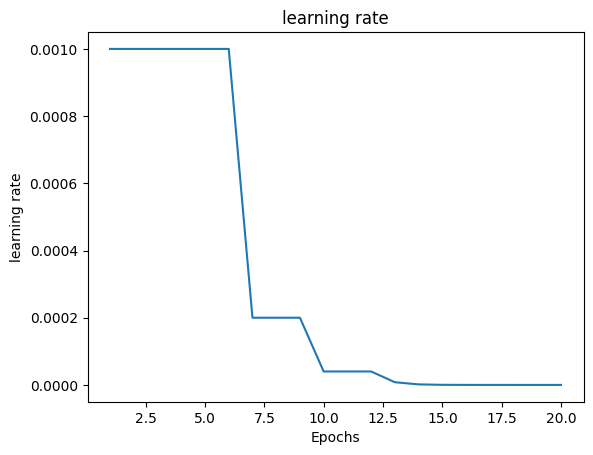

In [17]:
plotLR(history_reduce_lr)

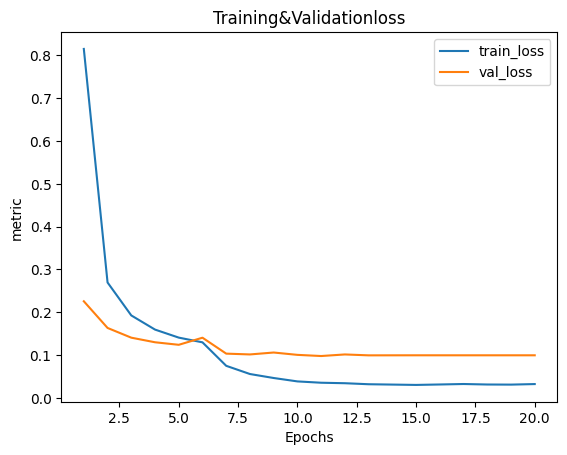

In [18]:
pltData(history_reduce_lr,"loss")

In [20]:
from keras.callbacks import LearningRateScheduler # devamlı learning rate i günceller

def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

model = mnist_model(input_shape)

history_lr_scheduler = model.fit(
                                    x = train_images,
                                    y = train_labels,
                                    epochs = 20,
                                    validation_split = 0.20,
                                    batch_size = 64,
                                    verbose = 2,
                                    callbacks = [LearningRateScheduler(scheduler, verbose = 1)]
                                    )


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/20
750/750 - 10s - loss: 1.2695 - accuracy: 0.8123 - val_loss: 0.2646 - val_accuracy: 0.9309 - lr: 0.0010 - 10s/epoch - 13ms/step

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/20
750/750 - 9s - loss: 0.3268 - accuracy: 0.9093 - val_loss: 0.1759 - val_accuracy: 0.9558 - lr: 0.0010 - 9s/epoch - 13ms/step

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/20
750/750 - 10s - loss: 0.2393 - accuracy: 0.9334 - val_loss: 0.1514 - val_accuracy: 0.9607 - lr: 0.0010 - 10s/epoch - 13ms/step

Epoch 4: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 4/20
750/750 - 10s - loss: 0.1817 - accuracy: 0.9464 - val_loss: 0.1414 - val_accuracy: 0.9647 - lr: 0.0010 - 10s/epoch - 13ms/step

Epoch 5: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 5/20
750/750 - 10s - loss: 0.1652 - accuracy

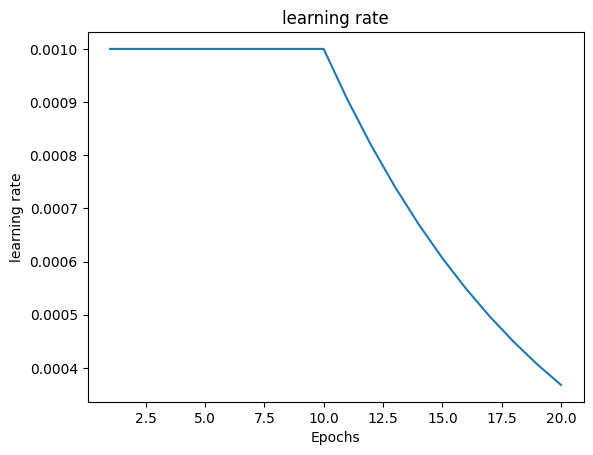

In [21]:
plotLR(history_lr_scheduler)

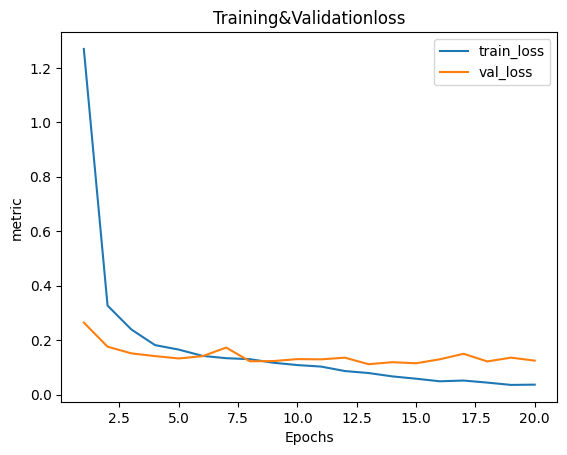

In [22]:
pltData(history_lr_scheduler,"loss")

In [23]:
from keras.callbacks import TensorBoard # görselleştirmek için kullanılır
import time

time = time.strftime("%Y_%m_%d_%H_%M_%S")

tensorboard = TensorBoard(log_dir = "logs/tensorboard/{}".format(time),
                          batch_size = 64,
                          histogram_freq = 1,
                         )

model = mnist_model(input_shape)

history_tensorboard = model.fit(
                                    x = train_images,
                                    y = train_labels,
                                    epochs = 20,
                                    validation_split = 0.20,
                                    batch_size = 64,
                                    verbose = 2,
                                    callbacks = [tensorboard]
                                    )

Epoch 1/20
750/750 - 11s - loss: 1.0991 - accuracy: 0.8419 - val_loss: 0.2620 - val_accuracy: 0.9357 - 11s/epoch - 14ms/step
Epoch 2/20
750/750 - 10s - loss: 0.3000 - accuracy: 0.9189 - val_loss: 0.1756 - val_accuracy: 0.9513 - 10s/epoch - 13ms/step
Epoch 3/20
750/750 - 10s - loss: 0.2064 - accuracy: 0.9424 - val_loss: 0.1643 - val_accuracy: 0.9545 - 10s/epoch - 13ms/step
Epoch 4/20
750/750 - 10s - loss: 0.1658 - accuracy: 0.9526 - val_loss: 0.1461 - val_accuracy: 0.9651 - 10s/epoch - 13ms/step
Epoch 5/20
750/750 - 9s - loss: 0.1461 - accuracy: 0.9573 - val_loss: 0.1340 - val_accuracy: 0.9683 - 9s/epoch - 13ms/step
Epoch 6/20
750/750 - 10s - loss: 0.1319 - accuracy: 0.9612 - val_loss: 0.1318 - val_accuracy: 0.9703 - 10s/epoch - 13ms/step
Epoch 7/20
750/750 - 10s - loss: 0.1239 - accuracy: 0.9646 - val_loss: 0.1196 - val_accuracy: 0.9707 - 10s/epoch - 13ms/step
Epoch 8/20
750/750 - 10s - loss: 0.1230 - accuracy: 0.9644 - val_loss: 0.1258 - val_accuracy: 0.9718 - 10s/epoch - 14ms/step
Ep

In [ ]:
print("tensorboard --logdir="+tensorboard.log_dir)